# # FYS-2021: Exercise set 3: Parametric Methods and Bayesian Decision Theory



Problem 2. We first load the education-salary.csv data set. Before loading the file, I removed the explaining text, and added headers to the columns (Type, Salary).

(2a) Plotting box plots and histograms for the three education levels

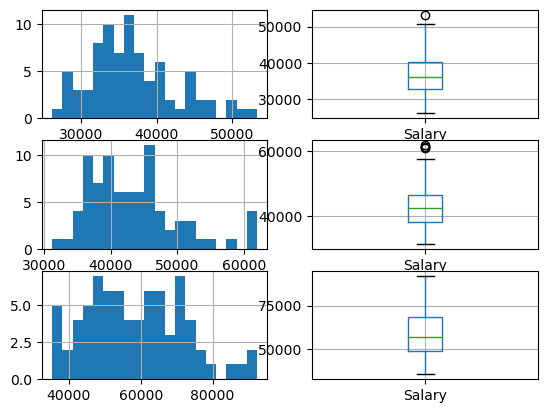

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("data/education-salary.csv", sep=" ")

primary = df[df['Type'] == 0]
high = df[df['Type'] == 1]
uni = df[df['Type'] == 2]

fig, axes = plt.subplots(nrows=3, ncols=2)
primary.Salary.hist(bins=20, ax=axes[0,0])
primary.boxplot(column=['Salary'], ax=axes[0,1])

high.Salary.hist(bins=20, ax=axes[1,0])
high.boxplot(column=['Salary'], ax=axes[1,1])

uni.Salary.hist(bins=20, ax=axes[2,0])
uni.boxplot(column=['Salary'], ax=axes[2,1])

plt.show()

The numerical value of $\mu_{MAP}$ for the elementary level based on the data

In [3]:
mu_MAP = primary.Salary.mean()
print("Estimate on the maximum a posteriory:", mu_MAP)

Estimate on the maximum a posteriory: 36928.9300382716


(2d and e) Classification of the education level will be based on using the normal distribution

In [87]:
def probability_gaussian(x, mean, std_dev):
        return (1 / (sqrt(2 * pi) * std_dev)) * exp(-0.5 * ((x - mean) / std_dev)**2)

x = 5000*12

probability_0 = probability_gaussian(x, primary.Salary.mean(), primary.Salary.std())
probability_1 = probability_gaussian(x, high.Salary.mean(), high.Salary.std())
probability_2 = probability_gaussian(x, uni.Salary.mean(), uni.Salary.std())

classificaiton = "Primary"

if probability_1 > probability_0 and probability_1 > probability_2:
    classificaiton = "High scool"

if probability_2 > probability_1 and probability_2 > probability_0 :
    classificaiton = "University"

print(probability_0, probability_1, probability_2)
print("An income of", x, "is classified as", classificaiton)


3.104740300012244e-08 2.977869890128442e-06 2.9267180869957245e-05
An income of 60000 is classified as University


(4f) Bayesian classification based on equation 4.22, assuming P(C_i) = N_i/N_total

In [5]:
from math import log
from math import pi

def discriminant_function(x, mean, std_dev, n_i, n_total) :
    return -0.5*log(2*pi) - log(std_dev) - 0.5*((x - mean)/std_dev)**2 - log(n_i/n_total)

x = 1490*12

g_0 = discriminant_function(x, primary.Salary.mean(), primary.Salary.std(), primary.Salary.count(), df.Salary.count())
g_1 = discriminant_function(x, high.Salary.mean(), high.Salary.std(), high.Salary.count(), df.Salary.count())
g_2 = discriminant_function(x, uni.Salary.mean(), uni.Salary.std(), uni.Salary.count(), df.Salary.count())

dict = {
    g_0 : "Primary",
    g_1 : "High School",
    g_2 : "University"
}

print(dict[max(dict.keys())], "is the education associated with an income of",x)

print(g_0, g_1, g_2)

Primary is the education associated with an income of 17880
-13.762688456865975 -15.772793157530424 -13.776010356047616


**Problem 3**

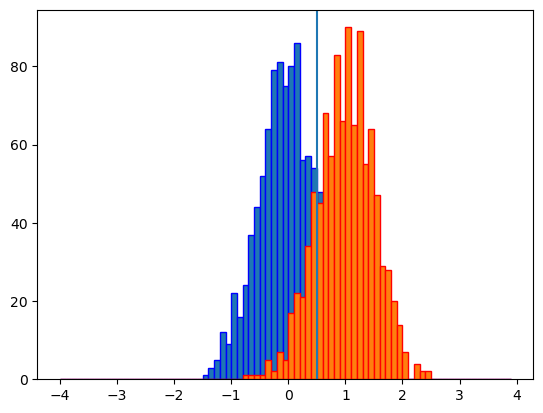

| 857 143 |
| 165 835 |
Accuracy: 0.846


In [3]:
from math import sqrt, pi, exp
from scipy.stats import uniform, norm   #PS: Could also have used numpy.random.normal
import matplotlib.pyplot as plt
import numpy as np

class Bayesian:

    def __init__(self ,prior_A, prior_B) :
        # define the prior probabilities
        self._prior_A = prior_A
        self._prior_B = prior_B
        self._mu_A = 0
        self._mu_B = 1
        self._sigma_A = 0.5
        self._sigma_B = 0.5

    # define the class likelihood functions as normal distributions
    def __likelihood(self, x, mean, std_dev):
        return (1 / (sqrt(2 * pi) * std_dev)) * exp(-0.5 * ((x - mean) / std_dev)**2)

    def classify(self, observations):
        # classify each observation
        classifications_bayesian = []
        for x in observations:

            # calculate the likelihoods of x belonging to each class
            likelihood_A = self.__likelihood(x, self._mu_A, self._sigma_A)
            likelihood_B = self.__likelihood(x, self._mu_B, self._sigma_B)

            # calculate the posterior probabilities using Bayes' theorem
            posterior_A = (likelihood_A * self._prior_A) / (likelihood_A * self._prior_A + likelihood_B * self._prior_B)
            posterior_B = (likelihood_B * self._prior_B) / (likelihood_A * self._prior_A + likelihood_B * self._prior_B)

            # determine the class with the highest posterior probability
            if posterior_A > posterior_B:
                # print(f"{x} belongs to class A")
                classifications_bayesian.append(0)
            else:
                # print(f"{x} belongs to class B")
                classifications_bayesian.append(1)

        return classifications_bayesian

    # See https://www.alphacodingskills.com/scipy/scipy-normal-distribution.php for nice docs on the norm function in scipy.stat
    def generate_normal_distributed_A(self, number):
        return norm.rvs(self._mu_A, self._sigma_A, number)

    def generate_normal_distributed_B(self, number):
        return norm.rvs(self._mu_B, self._sigma_B, number)

# (3b)
# Generate 1000 samples from each of the distributions, and classify these using your implementation.
# Calculate the confusion matrix, and plot the histograms of the samples. Illustrate the decision boundary
# together with the histograms.

bayesian = Bayesian(0.5, 0.5)
numbers_A = bayesian.generate_normal_distributed_A(1000)
numbers_B = bayesian.generate_normal_distributed_B(1000)

classifications_A = bayesian.classify(numbers_A)
classifications_B = bayesian.classify(numbers_B)

bin = np.arange(-4,4,0.1)

plt.hist(numbers_A, bins=bin, edgecolor='blue')
plt.hist(numbers_B, bins=bin, edgecolor='red')

# Plot decision boundary
plt.axvline(x=0.5)

plt.show()

# We consider A to be the FALSE class and B to be TRUE class. Thus, a confusion matrix will be
# | Number true  A  Number false B  |
# | Number false A  Number true B   |

true_negatives = classifications_A.count(0)
false_negatives = classifications_B.count(0)
true_positives = classifications_B.count(1)
false_positives = classifications_A.count(1)

# Se sci-py documentation for reference https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
print("|",true_negatives, false_positives, "|")
print("|",false_negatives, true_positives, "|")

# Accuracy is defined as Acc = (TP + TN)/(P + N)
acc = (true_positives + true_negatives)/2000
print("Accuracy:", acc)


(3c) Generate 1000 samples from a Unif(−0.87, 0.87) distribution, and 1000 samples from a Unif(0.13, 1.87).
Classify these samples using the same classifier as above. Calculate the accuracy, and compare it with the
previous result. You should see a drop in accuracy, even though the mean and standard-deviation of the
sampling distributions are equal. Why is this the case?

Accuracy: 0.7905


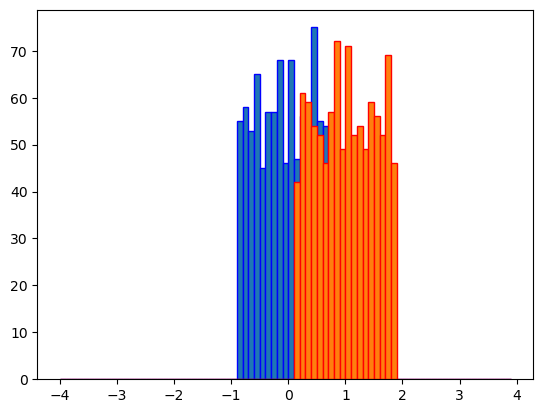

In [8]:
# Hmm, they seem to have changed the definition of the rvs function. Second argument is no longer the
# upper limit, but rather the length of the interval...

numbers_A = uniform.rvs(-0.87,2*0.87, 1000)
numbers_B = uniform.rvs(0.13,1.87-0.13, 1000)
classifications_A = bayesian.classify(numbers_A)
classifications_B = bayesian.classify(numbers_B)

# We consider A to be the FALSE class and B to be TRUE class. Thus, a confusion matrix will be
true_negatives = classifications_A.count(0)
false_negatives = classifications_B.count(0)
true_positives = classifications_B.count(1)
false_positives = classifications_A.count(1)

acc = (true_positives + true_negatives)/2000
print("Accuracy:", acc)

# The

plt.hist(numbers_A, bins=bin, edgecolor='blue')
plt.hist(numbers_B, bins=bin, edgecolor='red')
plt.show()


**Problem 4**

(4a) First read in the sms-spam-bow.csv. 

In [4]:
bow_representation_of_messages = np.loadtxt("data/sms-spam-bow.csv", delimiter=" ", dtype=int)
print(bow_representation_of_messages.shape)


(5574, 8443)


Now we have the x_j^t BOW matrix, where j is the word-index column-wise, ranging from 0 to 8441 (first column is the ham(0)/spam(1) flag), and t is the sample index ranging from 0 to 5573.


In [5]:
N = bow_representation_of_messages.shape[0]
# Husk å randomiser!!!
random_indexes = np.random.permutation(N)
bow_representation_of_messages = bow_representation_of_messages[random_indexes,:]

# Select 80% for training purposes, the rest for testing
N_train = int(N*0.8)
N_test = N - N_train

training_set = bow_representation_of_messages[:N_train, :]
test_set = bow_representation_of_messages[N_train:, :]


Now, find all the parameters necessary for the classifier based on the training data
First, let's find how many ham/spam messages there are

In [17]:

which_class = training_set[:, 0]
rows_with_ham=np.where(which_class==0)
rows_with_spam=np.where(which_class==1)


N_ham = np.size(rows_with_ham)
N_spam = np.size(rows_with_spam)

print ("Spams: ", N_spam, "Hams: ", N_ham)

BOW_samples = bow_representation_of_messages[:, 1:]
hams = BOW_samples[rows_with_ham,:]
spams = BOW_samples[rows_with_spam,:]

# Now, aggregate this matrix vertically. That is, find number of occurances of word j in all spam and ham "documents".
N_hams_j = np.sum(hams, axis=1)
N_spams_j = np.sum(spams, axis=1)

# These are used for estimators for p_ij (eq. 5.31)
alpha = 1  #Laplace smoothing parameter
rel_freq_hams = (N_hams_j + alpha)/(N_ham + 2*alpha)
rel_freq_spams = (N_spams_j + alpha)/(N_spam + 2*alpha)
log_p0j = np.log(rel_freq_hams)
log_p1j = np.log(rel_freq_spams)

log_p0j_inv = np.log(1-rel_freq_hams)
log_p1j_inv = np.log(1-rel_freq_spams)


# The priors
P_ham = N_ham/N_train
P_spam = N_spam/N_train

# Now we are ready to write the discriminant functions for ham/spam. The input x is the bow representation of a message
# Note: The dot product performs the necessary sum over all the words (j-dimension)
def g_ham( x ) :
    return float(log_p0j.dot(x) + log_p0j_inv.dot((1-x)) + np.log(P_ham))

def g_spam( x ) :
    return float(log_p1j.dot(x) + log_p1j_inv.dot((1-x)) + np.log(P_spam))


Spams:  602 Hams:  3857


And now we are ready to test.

In [18]:
real_class = test_set[:, 0]

true_positives = 0
false_positives = 0
true_negatives = 0
false_negatives = 0
for i in range(N_test):
    msg = test_set[i,1:]
    y = real_class[i]
    msg = msg.reshape(len(msg),1)
    # print("Ham value:", g_ham(msg), "Spam value:", g_spam(msg), "Ground truth:",y==1,"Flagged:", g_spam(msg) > g_ham(msg) )
    if g_spam(msg) > g_ham(msg) :  # We predicted spam
        if y == 1:
            true_positives += 1
        else :
            false_positives += 1
    else :   # We predicted ham
        if y == 0:
            true_negatives += 1
        else :
            false_negatives += 1

# Confusion matrix
print("|",true_negatives, false_positives, "|")
print("|",false_negatives, true_positives, "|")
print("Accuracy:",(true_positives + true_negatives)/N_test)


| 966 4 |
| 17 128 |
Accuracy: 0.9811659192825112
